<a href="https://colab.research.google.com/github/maxmigue/machineLearning/blob/main/Tarea_Titanic_DesitionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Actividad Evaluada: Árboles de Decisión en el Dataset Titanic

📚 **Curso:** Machine Learning

## 📝 Instrucciones
- Este notebook debe ser completado individualmente y subido a la plataforma del curso.
- Responde todas las celdas marcadas como código y asegúrate de que el notebook se ejecute sin errores.
- Puedes usar material del curso y documentación oficial de Python y Scikit-learn.

## 📄 Descripción del Dataset
El dataset **Titanic** contiene información sobre los pasajeros del famoso barco Titanic que naufragó en 1912. El objetivo es predecir si un pasajero sobrevivió o no (`Survived` = 1 si sobrevivió, 0 si no), a partir de variables como edad, clase, sexo, y punto de embarque.

Este conjunto de datos es ampliamente utilizado en aprendizaje automático como un primer ejemplo de clasificación supervisada.

---

# 🌊 Actividad Evaluada: Árboles de Decisión con el Dataset Titanic

En esta actividad aplicarás un modelo de árboles de decisión sobre el dataset Titanic.

### 🎯 Objetivos:
- Cargar y explorar el dataset
- Preprocesar las variables categóricas con One Hot Encoding
- Entrenar un árbol de decisión
- Visualizar el árbol
- Evaluar el desempeño del modelo

🕐 Tiempo estimado: 60 a 90 minutos

In [ ]:
import pandas as pd


# 📥 Cargar el dataset desde la URL de Kaggle (alternativamente cargar localmente)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 1. Exploración inicial del dataset

In [ ]:
columnas = df.columns
print(columnas)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 🧹 2. Preprocesamiento
- Eliminar columnas irrelevantes como 'PassengerId', 'Name', 'Ticket', 'Cabin'
- Rellenar valores nulos en 'Age' y 'Embarked'
- Aplicar One Hot Encoding a 'Sex' y 'Embarked'

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np


df_NoIrrelevantCells = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)   # Eliminamos columnas irrelevantes


# Rellenar NaN en campo "Age" usando la media:
imputer = SimpleImputer(strategy='mean')
df_NoIrrelevantCells['Age'] = imputer.fit_transform(df_NoIrrelevantCells[['Age']])


# Para rellenar campos en "Embarked", se hará de manera aleatoria entre aquellos valores posibles

# Ver los valores únicos que no son NaN
valores_existentes = df_NoIrrelevantCells['Embarked'].dropna().unique()

# Rellenar NaN de forma aleatoria con los valores existentes
df_NoIrrelevantCells['Embarked'] = df_NoIrrelevantCells['Embarked'].apply(
    lambda x: np.random.choice(valores_existentes) if pd.isna(x) else x
)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# One hot encoding a campos "Sex" y "Embarked"

df_NoIrrelevantCells = pd.get_dummies(df_NoIrrelevantCells, columns=['Sex', 'Embarked'])
df_NoIrrelevantCells.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


## 🧠 3. Entrenamiento del modelo de Árbol de Decisión

In [ ]:
# Selección de variables
X = df_NoIrrelevantCells.drop('Survived', axis=1)
y = df_NoIrrelevantCells['Survived']

# Creación de modelo
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)


DecisionTreeClassifier(max_depth=4)

## 🌳 4. Visualización del árbol

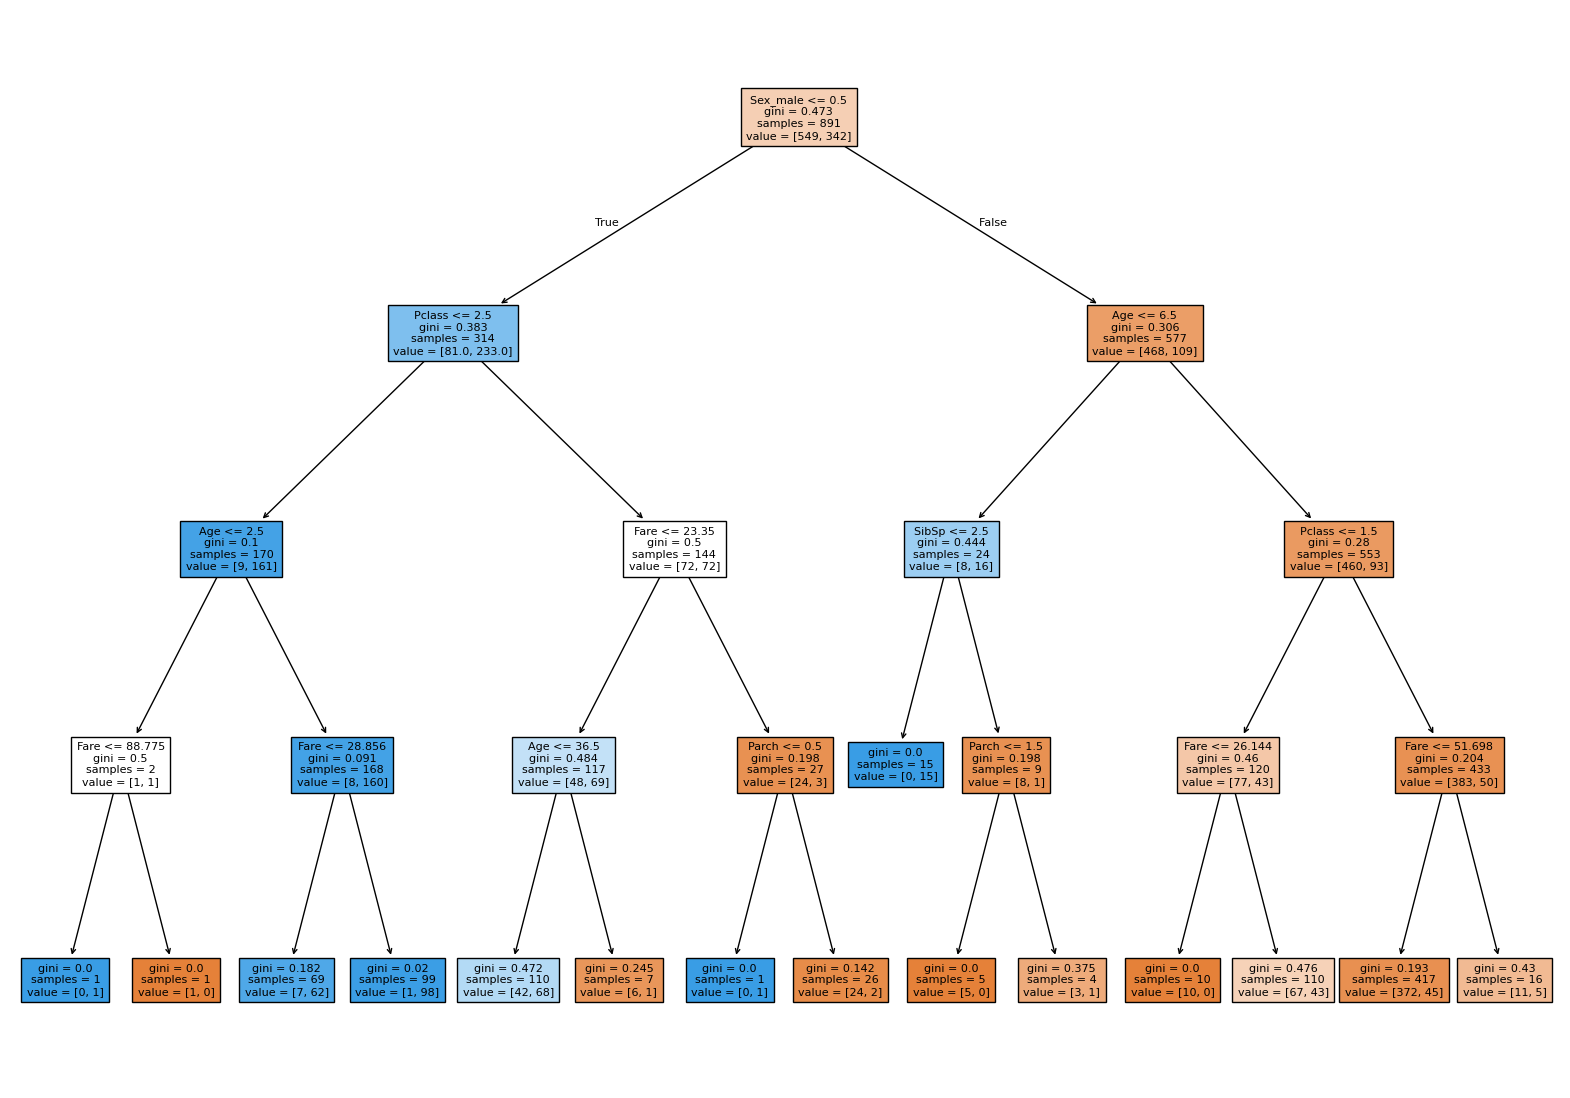

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,14))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True, fontsize=8);

## 📈 5. Evaluación del modelo

In [ ]:
y_pred = model.predict(X) # Columna con predicción si sobrevivió o no
df_NoIrrelevantCells['pred'] = y_pred # Se agrega la columna al dataFrame
df_NoIrrelevantCells.sample(10)[['Survived','pred']] # Se toma una muestra de 10 predicciones con su resultado original

from sklearn.metrics import accuracy_score
score = accuracy_score(y, y_pred)  # Evaluación de modelo
print(score)

0.835016835016835


---
## 🤔 Preguntas de Reflexión

Responde brevemente las siguientes preguntas al final de tu actividad. Puedes escribir tus respuestas directamente bajo cada pregunta:

1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?

2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?

3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?

4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?

5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?


**1. ¿Qué variables crees que fueron más importantes para predecir la supervivencia? ¿Por qué?**

In [ ]:
# En primera instancia el sexo de la persona, siendo el primer atributo con el cual se realiza la separación en el arbol,
# además de la clase de pasajero, siendo los de mayor clase quienes tienen mayor chance de sobrevivir.


**2. ¿Qué limitaciones puede tener un árbol de decisión si no se controla su profundidad?**

In [ ]:
# A medida que el árbol se profundiza, se puede producir un sobreajuste con los datos del sistema


**3. ¿Qué diferencias habría si usáramos codificación ordinal en lugar de One Hot Encoding?**

In [ ]:
# Que en codificación ordinal se presentan ciertas jerarquías, cosa que no siempre es práctica para datos categóricos,
# por ejemplo, con colores, los cuales no tienen un orden o nivel específico.


**4. ¿Qué cambiarías en el preprocesamiento o configuración del modelo para mejorar los resultados?**

In [ ]:
# Trataría de rellenar los campos Nan mediante predicción (en base al resto de datos) del valor de cada uno de ellos, viendo
# que valor tenía en contextos/atributos similares de otras muestras.


**5. ¿Crees que este modelo se puede usar directamente en un entorno real? ¿Qué consideraciones éticas o técnicas deberías tener?**

In [ ]:
# Considero que sí se puede usar en un entorno real, priorizando aquellos datasets que contengan en su mayoría
# datos categóricos. Consideraciones éticas o técnicas pueden ser la sensibilidad de la información, si es que
# es legal trabajar con esos datos o si la decisión que toma el modelo implica un cambio en la vida/salud de una o varias
# personas. En cuanto a técnicas, se debe considerar el tipo de datos con los que se están trabajando y considerar
# la tecnología actual para el procesamiento del modelo, saber las especificaciones y potencia que deba tener un equipo
# para realizar estas tareas con un alto flujo de datos.
